In [2]:
import rasterio
import cv2
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
with rasterio.open("/home/user/projects/africa_starving/data/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/GRANULE/L1C_T34JEP_A007983_20170101T084543/IMG_DATA/T34JEP_20170101T082332_B01.jp2", "r") as src:
    meta = src.meta
    image = src.read()

In [31]:
image.max()

7161

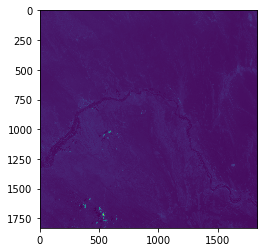

In [30]:
plt.imshow(image[0])

In [33]:
meta['transform']

Affine(60.0, 0.0, 499980.0,
       0.0, -60.0, 6900040.0)

In [19]:
meta['crs']['init']

'epsg:32734'

In [21]:
meta

{'count': 1,
 'crs': CRS({'init': 'epsg:32734'}),
 'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'height': 1830,
 'nodata': None,
 'transform': Affine(60.0, 0.0, 499980.0,
        0.0, -60.0, 6900040.0),
 'width': 1830}

In [3]:
pd.read_csv("/home/user/projects/africa_starving/data/crop_id_list.csv")

,crop_id,crop
0,1,Cotton
1,2,Dates
2,3,Grass
3,4,Lucern
4,5,Maize
5,6,Pecan
6,7,Vacant
7,8,Vineyard
8,9,"Vineyard & Pecan (""Intercrop"")"


In [ ]:
from functools import partial
import pyproj
from shapely.ops import transform

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:3395'), # source coordinate system
    pyproj.Proj(init='epsg:26913')) # destination coordinate system

g2 = transform(project, g1)  # apply projection

In [5]:
train_df = gpd.read_file("/home/user/projects/africa_starving/data/train/train/train.shp")

In [68]:
test_df = gpd.read_file("/home/user/projects/africa_starving/data/test/test/test.shp")
test_df.crs = {'init' :'epsg:3395'}

In [71]:
test_df.to_file("/home/user/projects/africa_starving/data/test/test/test_repr.geojson", driver='GeoJSON')

In [69]:
test_df = test_df.to_crs({'init' :meta['crs']['init']})

In [45]:
train_df.crs = {'init' :'epsg:3395'}

In [48]:
train_df.crs

{'init': 'epsg:3395'}

In [49]:
meta['crs']['init']

'epsg:32734'

TypeError: 'bool' object is not callable

In [65]:
df = df.to_crs({'init' :meta['crs']['init']})

In [66]:
df.to_file("/home/user/projects/africa_starving/data/train/train/train_repr.geojson", driver='GeoJSON')

In [5]:
train_df = gpd.read_file("/home/user/projects/africa_starving/data/train/train/train_repr.geojson")

In [10]:
train_df['Crop_Id_Ne'].value_counts()

8    941
4    536
5    283
7    267
6    146
1    142
3     95
9     77
2      7
Name: Crop_Id_Ne, dtype: int64

In [19]:
train_df.describe()

,Field_Id,Area,Subregion
count,2494.000000,2494.000000,2494.000000
mean,1814.447073,2.483497,3.642743
std,1044.738634,2.658522,1.564073
min,1.000000,0.022411,0.000000
25%,910.250000,0.995807,3.000000
50%,1812.500000,1.907840,3.000000
75%,2745.750000,3.191395,5.000000
max,3603.000000,52.723100,7.000000


/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


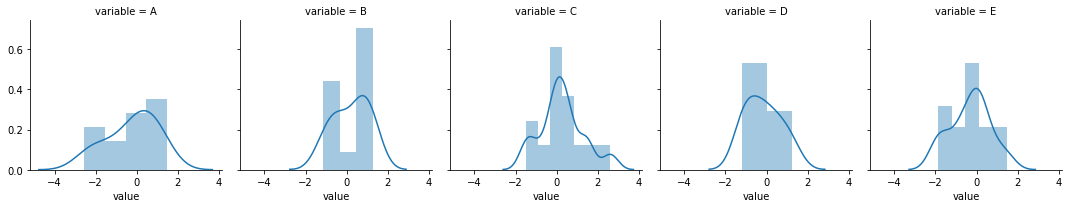

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(np.random.randn(14,5), columns=list("ABCDE"))

g = sns.FacetGrid(df.melt(), col="variable")
g.map(sns.distplot, "value")

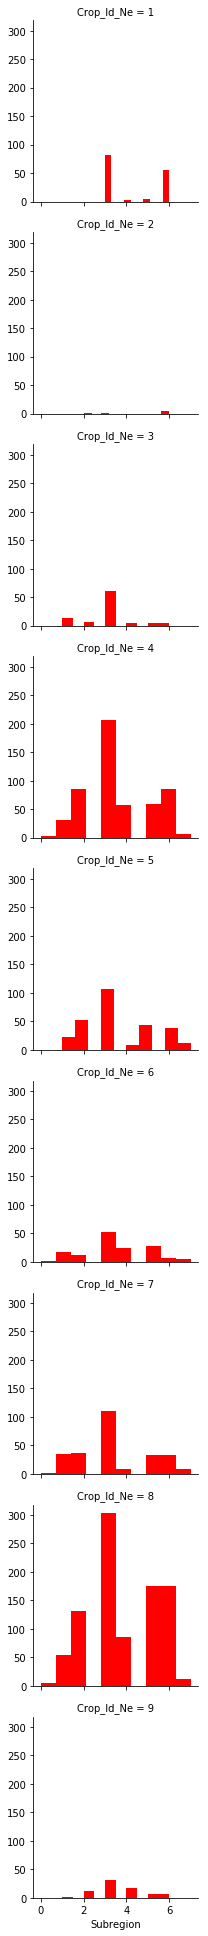

In [42]:
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(train_df, row="Crop_Id_Ne")
g = g.map(plt.hist, "Subregion", color="r")

/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/user/.virtualenvs/cv34/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


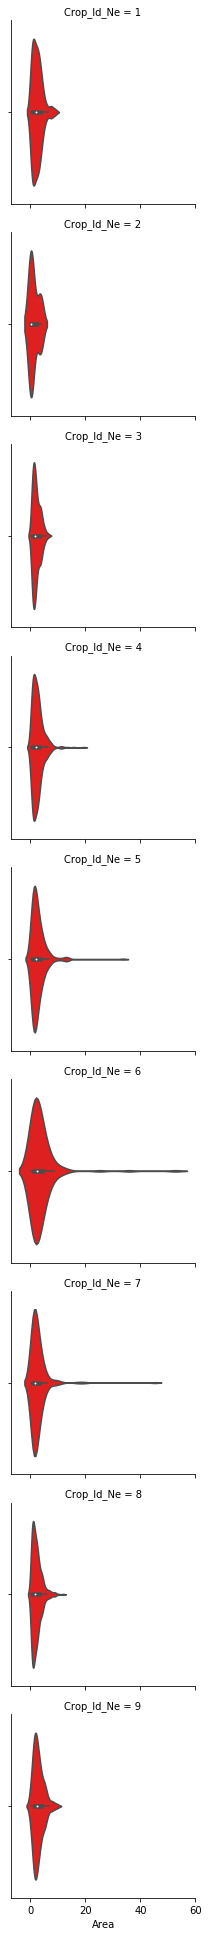

In [46]:
bins = np.arange(0, 65, 5)
g = sns.FacetGrid(train_df, row="Crop_Id_Ne")
g = g.map(sns.violinplot, "Area", color="r")

(array([81.,  0.,  0.,  2.,  0.,  0.,  4.,  0.,  0., 55.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

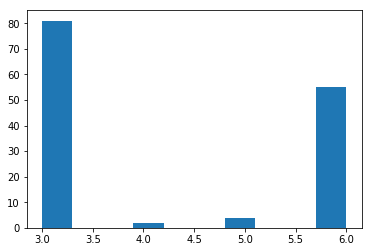

In [29]:
plt.hist(train_df[train_df['Crop_Id_Ne'] == '1']['Subregion'])

(array([37., 28., 26., 20., 16.,  5.,  3.,  1.,  4.,  2.]),
 array([0.133451 , 1.0157919, 1.8981328, 2.7804737, 3.6628146, 4.5451555,
        5.4274964, 6.3098373, 7.1921782, 8.0745191, 8.95686  ]),
 <a list of 10 Patch objects>)

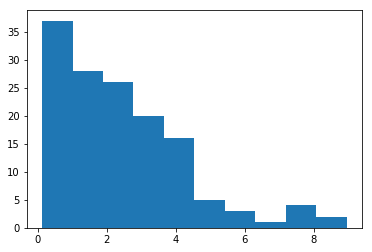

In [18]:
plt.hist(train_df[train_df['Crop_Id_Ne'] == '1']['Area'])

In [14]:
train_df.groupby(['Crop_Id_Ne']).median()

,Field_Id,Area,Subregion
Crop_Id_Ne,,,
1,1746.5,2.134550,3.0
2,1887.0,0.351502,6.0
3,1212.0,1.664960,3.0
4,1746.0,2.119970,3.0
5,1788.0,1.933350,3.0
6,3501.5,2.238630,3.0
7,1641.0,1.814210,3.0
8,1813.0,1.796070,3.0
9,1461.0,2.228110,3.0


In [59]:
df = train_df[train_df.geometry.notnull()]

In [62]:
len(train_df)

2497

In [61]:
len(df)

2494

In [44]:
train_df.set_crs('epsg:3395')

AttributeError: 'GeoDataFrame' object has no attribute 'set_crs'

In [43]:
train_df.iloc[0]['geometry'].exterior.coords.xy

(array('d', [2467881.1750413314, 2468026.166997987, 2468030.9295075075, 2467906.045924405, 2467881.1750413314]),
 array('d', [-3352032.0592964217, -3352002.1613220456, -3352046.3468240052, -3352113.021952709, -3352032.0592964217]))

In [20]:
train_df.to_crs(meta['crs']['init'])

RuntimeError: b'no arguments in initialization list'